<center>
<img src="logo.png" height="900"> 
</center>


#  Обсчёт АБ-теста

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as sts
import matplotlib.pyplot as plt

plt.style.use('ggplot')
%matplotlib inline

Давайте представим, что у нас с вами есть сервис, который работает по подписке (онлайн игра, стриминговый сервис, например). Один из важных факторов успешности бизнеса в таком случае - это удержание пользователей, нам надо придумать, как заинтересовать пользователя в продлении подпсики. Возникла идея дать скидку в $1\%$ на продление подписки. Чтобы оценить эфект от этой идеи мы как-то разбили пользователей, которые купили подписку за период теста, на две группы и одним дали скидку на продление, а другим нет.

In [3]:
df1 = pd.read_csv('data/subscribers_1.csv', sep=',')
print(df1.shape)
df1.head( )

(25935, 10)


,user_id,service_id,product_name,product_duration,rn,sale_date,last_duration_days,new_duration_days,is_same,group
0,47233,929,subscription,1_month,1,2018-12-21,30.0,30,1,0
1,50195,929,subscription,1_month,1,2019-03-17,30.0,30,1,1
2,62594,929,subscription,1_month,1,2019-02-08,30.0,30,1,0
3,68918,929,subscription,1_month,2,2019-03-19,30.0,30,1,1
4,91900,929,subscription,3_month,1,2018-10-29,30.0,90,0,0


* `rn` - порядковый номер покупки подписки за период.  
* `last_duration_days` - длительность предыдущей подписки.
* `new_duration_days` - длительность текущей подписки.
* `is_same` - менялась ли длительность подписки.
* `group` - группа теста, в которую попал пользователь. 1 - тест, 0 - контроль.

__а)__ Обсчитайте результаты АБ-теста. Найдите разницу между старой и новой длительностями подписки. Постройте для этой разницы гистограмму. Подумайте и дайте себе ответ на следующие вопросы:

- Можно ли воспользоваться предпосылкой о нормальности распределения приростов и проверить гипотезу тестом Уэлча? 
- Переменная, для которой мы проводим тест имеет дискретное распределение. Можно ли здесь использовать тест Манна-Уитни? Даст ли это коректный результат? 
- Будет ли корректно использовать для проверки гипотезы ЦПТ и тест о равенстве средних, основанный на ней? 

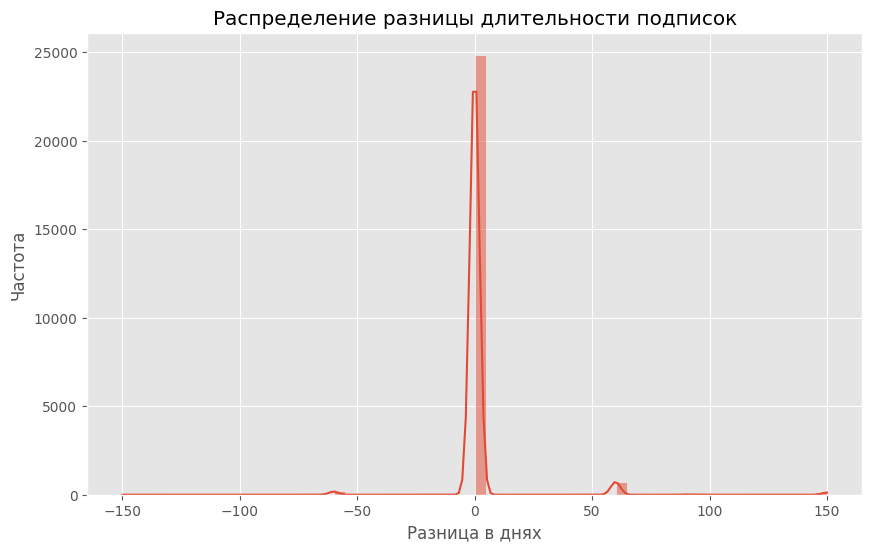

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

# your code here

df1['duration_diff'] = df1['new_duration_days'] - df1['last_duration_days']
plt.figure(figsize=(10, 6))
sns.histplot(df1['duration_diff'], kde=True, bins=60)
plt.title('Распределение разницы длительности подписок')
plt.xlabel('Разница в днях')
plt.ylabel('Частота')
plt.show()

- Тест Уэлча можно использовать, если распределение близко к нормальному. По гистограмме нельзя точно понять, какое распределение наблюдается, так как хорошо видель только один пин около нуля (скорее равномерное распределение, или точечное), хвостов же нет практически.
- Тест Манна-Уитни применим, но интерпретирует разницу в распределениях, а не средних. Результаты могут быть менее точными для дискретных данных.
- ЦПТ обоснована при больших выборках, поэтому тест на средние корректен (в нашем случае данных >10000, что совсем неплохо)

Правда ли, что средняя длительность подписки изменилась на $1\%$ уровне значимости? Для ответа на этот вопрос воспользуйтесь асимптотическим тестом на равенство средних против двусторонней альтернативы. Сохраните в переменную `z_obs` получившееся значение статистики, а в `pvalue` получившееся $p$-значение.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

z_obs = ...
pvalue = ...

# your code here
from statsmodels.stats.weightstats import ztest

control = df1[df1['group'] == 0]['duration_diff']
test_group = df1[df1['group'] == 1]['duration_diff']

z_obs, pvalue = ztest(test_group, control, value=0, alternative='two-sided')

In [16]:
# проверка того, что задание решено верно
assert np.abs(z_obs) < 1
assert np.abs(z_obs) > 0.7

# подобные тесты скрыты от вас 


__б)__ А теперь представим, что мы продвинутые АБ-тестеры и решили провести ААБ тест (2 контрольные группы и одну тестовую).

In [17]:
df2 = pd.read_csv('data/subscribers_2.csv', sep=',')
print(df2.shape)
df2.head( )

(25935, 10)


,user_id,service_id,product_name,product_duration,rn,sale_date,last_duration_days,new_duration_days,is_same,new_group
0,47233,929,subscription,1_month,1,2018-12-21,30.0,30,1,0
1,50195,929,subscription,1_month,1,2019-03-17,30.0,30,1,2
2,62594,929,subscription,1_month,1,2019-02-08,30.0,30,1,0
3,68918,929,subscription,1_month,2,2019-03-19,30.0,30,1,2
4,91900,929,subscription,3_month,1,2018-10-29,30.0,90,0,0


* `new_group` - группа теста, в которую попал пользователь. $2$ - тест, $0,1$ - контроль.

Проверьте гипотезу о том, что в каждой из контрольных групп среднее совпадает с тестовой на уровне значимости $1\%$. Получившиеся $p$-значения запишите в переменные `pval_1` и `pval_2`. Сделайте корректировку методом Холма. Запишите количество отвергнутых гипотез в переменную `hyp_cnt`. 

In [24]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

pval_1 = ...
pval_2 = ...
hyp_cnt = ...

# your code here

df2['duration_diff'] = df2['last_duration_days'] - df2['new_duration_days']
group0 = df2[df2['new_group'] == 0]['duration_diff']
group1 = df2[df2['new_group'] == 1]['duration_diff']
group2 = df2[df2['new_group'] == 2]['duration_diff']

_, pval_1 = ztest(group2, group0, value=0, alternative='two-sided')
_, pval_2 = ztest(group2, group1, value=0, alternative='two-sided')

from statsmodels.stats.multitest import multipletests
pvals = [pval_1, pval_2]
reject, pvals_corrected, _, _ = multipletests(pvals, alpha=0.01, method='holm')
hyp_cnt = sum(reject)

In [25]:
# проверка того, что задание решено верно
assert pval_1 < 0.5
assert pval_1 > 0.4
assert pval_2 > 0.3
assert pval_2 < 0.4

# подобные тесты скрыты от вас 

Какие выводы можно сделать из этого теста?  Валиден ли такой тест?  Если нет, то в чем может быть проблема? Если тут вообще смысл делать поправку Холма?

После корректировки Холма ни одна из гипотез не отвергается на уровне значимости 1%, тест валиден только при условии, что контрольные группы (0 и 1) однородны. Если между ними есть систематические различия, это нарушает предпосылки ААВ-теста.

Поправка Холма здесь уместна, так как проводится множественное сравнение. Однако в данном случае она лишь подтверждает отсутствие статистически значимых различий.